# Example - Demonstration of Cusp-Artifacts (50 Emitters with Slowly Varying Rho)

This notebook is a demonstration of 'cusp-artifacts' that exist in high-order SOFI images. To get familiar with cusp-artifacts, please start with our first [demo](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/Example_CuspArtifactsDemo1_3Emitters.ipynb) with 3 emitters with different $\rho$. For more explanation and condition exploration for cusp-artifacts, please refer to [this paper](https://www.biorxiv.org/content/10.1101/545574v2.full.pdf)). 

Here we show the dependence of cusp-artifacts on slowly varying $\rho$. **A semicircle is populated with emitters having $\rho$ values ranging from 0.01 (top) to 0.99 (bottom) with around 0.02 intervals.** The simulated video can be found [here](). We first generated the simulation, and performed fourier interpolation on it (the same as [demo 1](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/Example_CuspArtifactsDemo1_3Emitters.ipynb)).  

The simulation shows that high-order cumulants can oscillate around zero, and the oscillation of different orders follows the plot in fig. 1 of the same paper. Specifically, the number of zero crossings increases as the order of cumulants increases. This is a similar example as shown in the fig. 6 of the [paper](https://www.biorxiv.org/content/10.1101/545574v2.full.pdf).

In this notebook, we demonstrate how to use **pysofi** to generate high-order SOFI images (auto-cumulants), and monitor the change of cumulant values with slowly varying on-time ratio $\rho$.

In [14]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from functions import visualization as v
from functions import (data, filtering, masks, finterp)
import tifffile as tiff
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the Simulated Video (Tiff File).

First, we load the video into a Data object.

In [2]:
filepath = '../SampleData/simulations'
filename = 'SlowVaryingRho_frame2000_Emi51_InterpNum8.tif'

im = data.Data(filepath, filename)

In [3]:
im.average_image()

array([[0.8595, 1.0045, 1.2365, ..., 0.0455, 0.0445, 0.0445],
       [0.935 , 1.074 , 1.3   , ..., 0.0405, 0.044 , 0.0445],
       [1.04  , 1.185 , 1.445 , ..., 0.052 , 0.0445, 0.0515],
       ...,
       [1.2485, 1.239 , 1.3075, ..., 0.006 , 0.005 , 0.0045],
       [1.0875, 1.063 , 1.1125, ..., 0.004 , 0.004 , 0.004 ],
       [0.994 , 0.9985, 1.0245, ..., 0.005 , 0.004 , 0.004 ]])

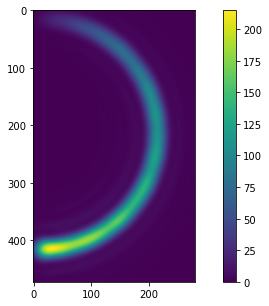

In [7]:
# Plot the mean image.
plt.figure(figsize=(10,5))
plt.imshow(im.ave)
plt.colorbar()

As we can see from the image above, as the on-time ratio increase, the average brightness of the emitter increases as well.

## Calculate auto-cumulants to the 7th order.

<code>im.cumulants_images</code> is a method of the Data object that returns all cumulant-reconstructed images up to the highest order that the user defines. Here we set the <code>highest_order=7</code>, but the user can choose a bigger or smaller value base on the need. The <code>im.cumulants_set</code> with arrays of all sumulant orders will be generted and can be called later.

In [12]:
k_set = im.cumulants_images(highest_order=7)

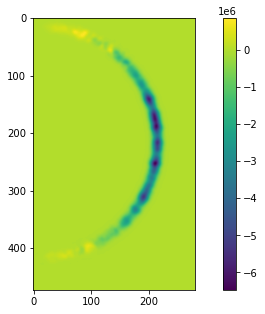

In [13]:
# Plot the 4th-order auto-cumulant SOFI image.
plt.figure(figsize=(10,5))
plt.imshow(im.cumulants_set[4])
plt.colorbar()

## Plot the cumulant-reconstructed images.
This is a similar example as fig. 6 of [this paper](https://www.biorxiv.org/content/10.1101/545574v2.full.pdf). A semicircle is populated with emitters having $\rho$ values ranging from 0.01 (top) to 0.99 (bottom) with around 0.02 intervals. Cumulants of different orders are displayed below.

The simulation shows that high-order cumulants can oscillate around zero, and the oscillation of different orders matches the plot in fig. 1 of the same paper. Specifically, the number of zero crossings increases as the order of cumulants increases.

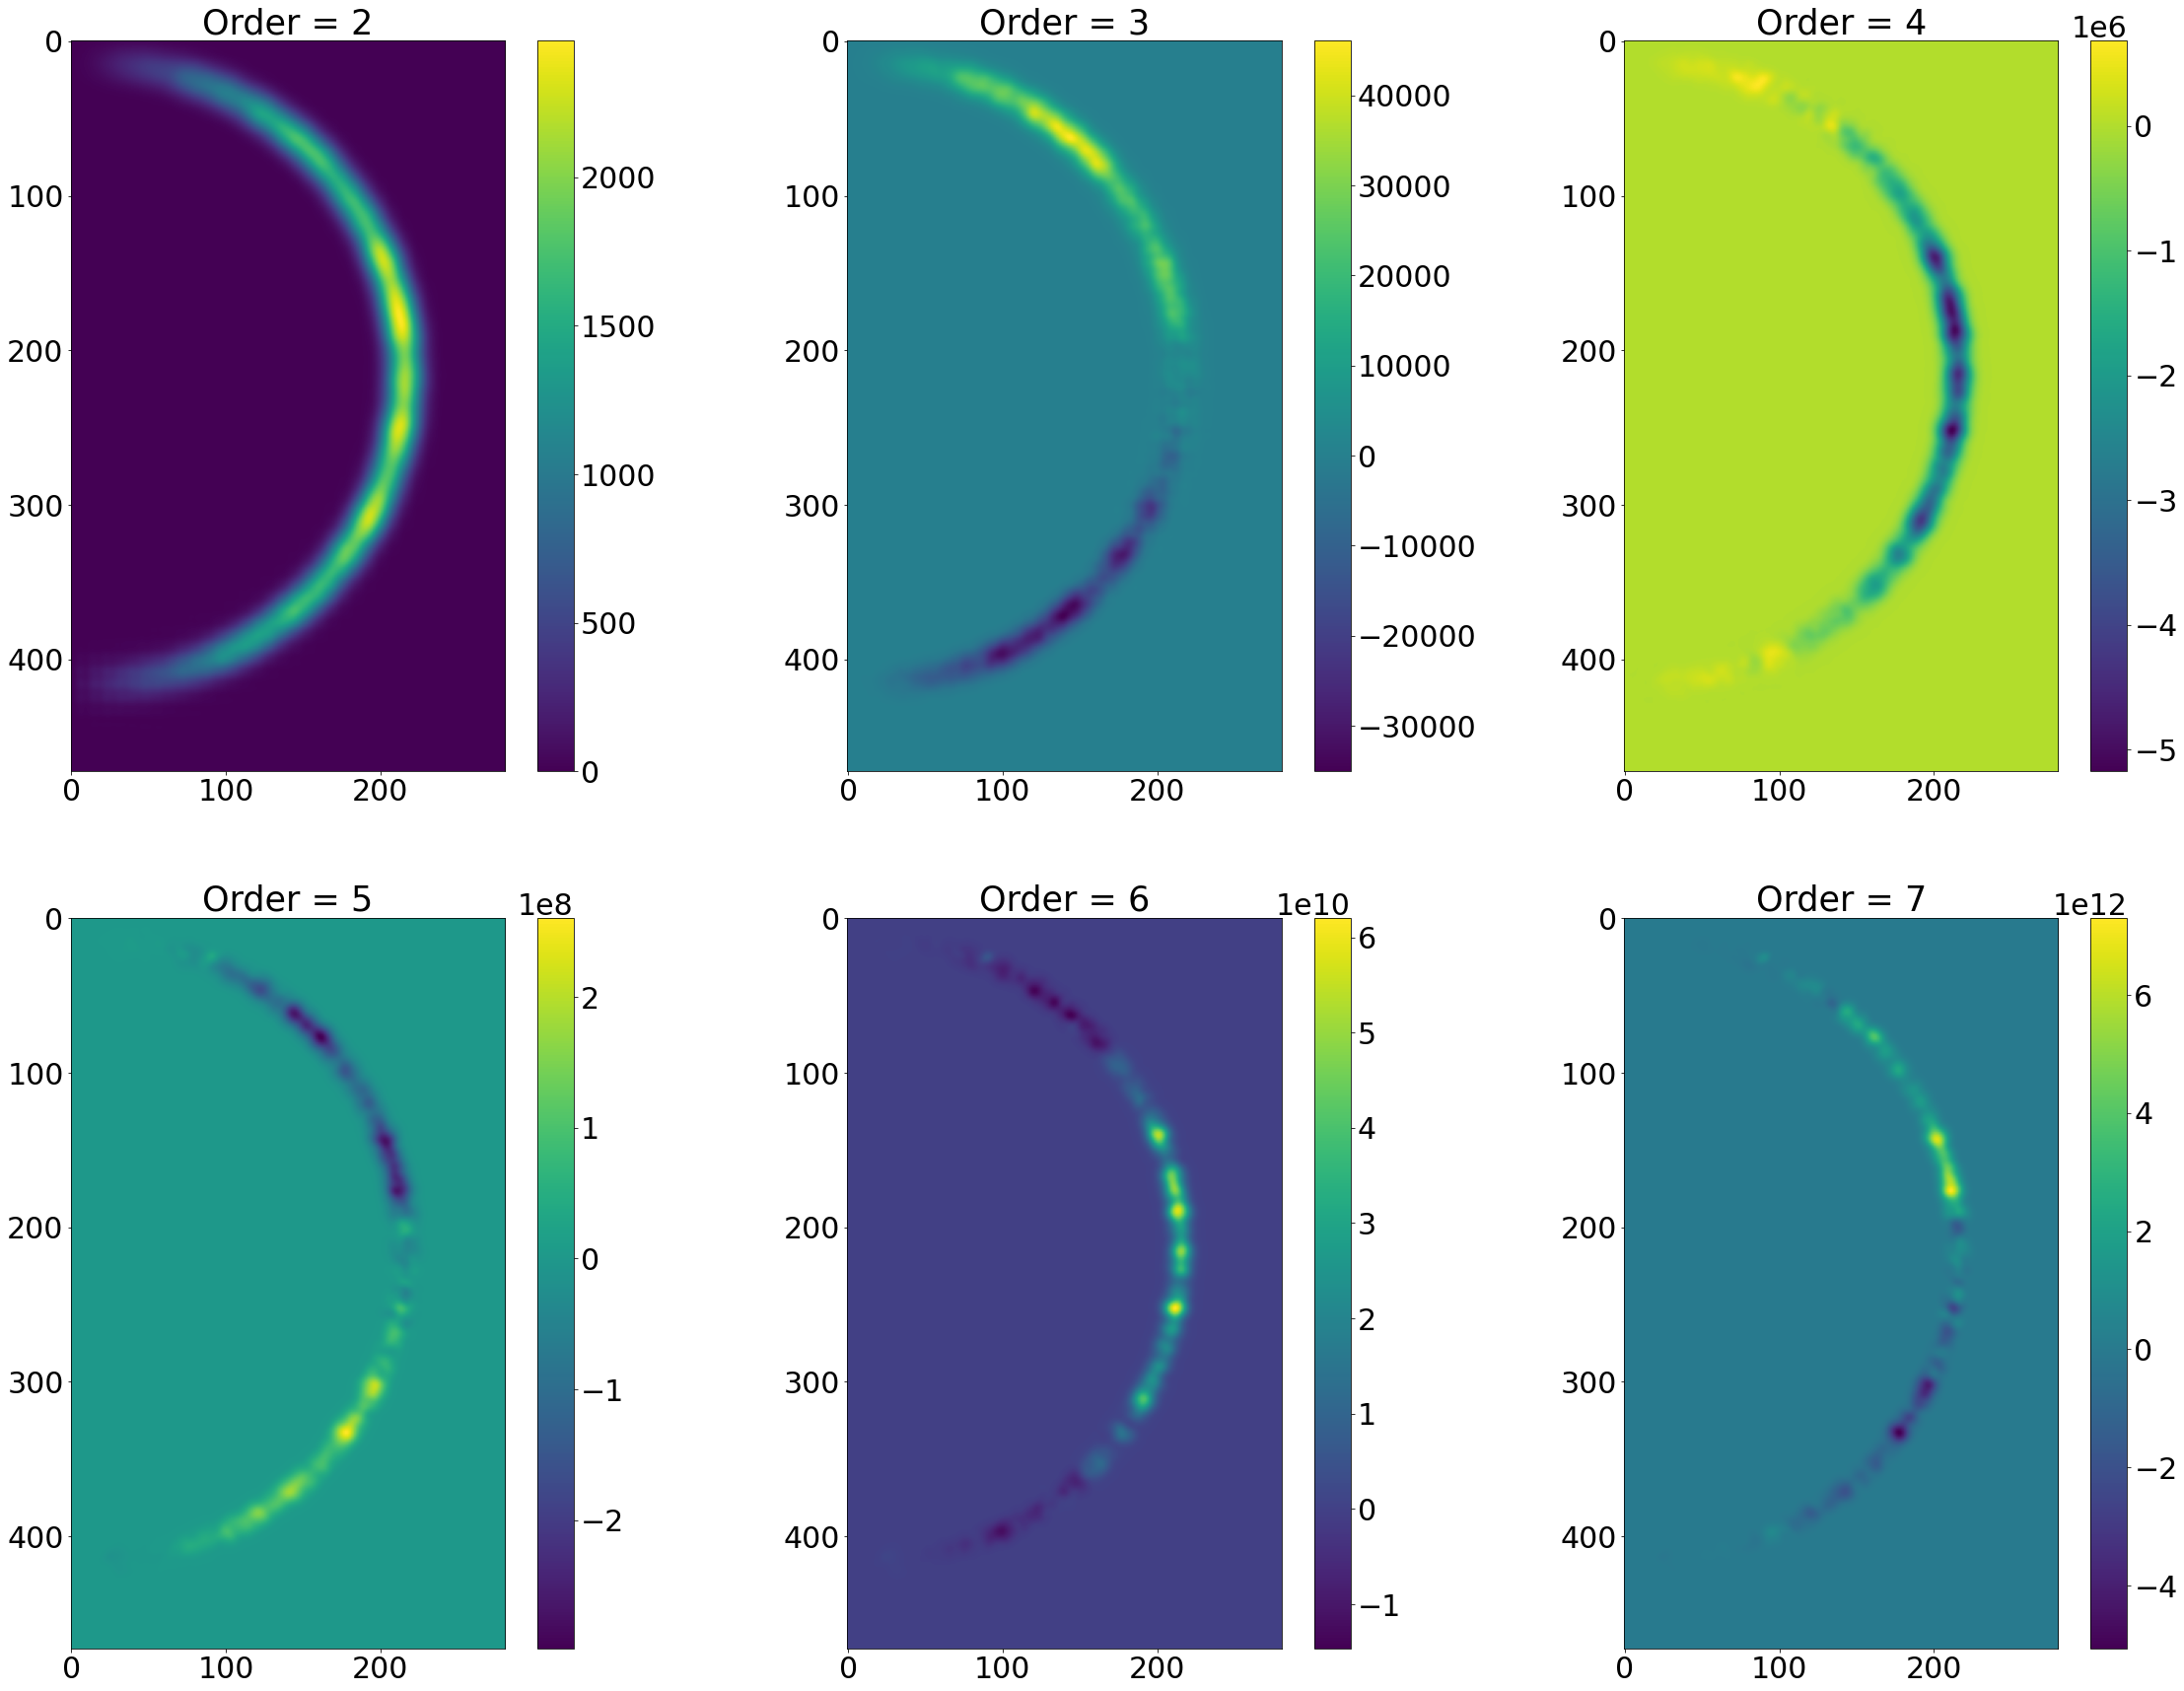

In [10]:
fig, axs = plt.subplots(2,3,figsize=(40,30))
for i in range(2,8):
    row = (i - 2) // 3
    ax = axs[row,i-2-row*3]
    img = ax.imshow(im.cumulants_set[i]*0.8)
    ax.tick_params(axis='x', labelsize= 30)
    ax.tick_params(axis='y', labelsize= 30)
    ax.set_title(f'Order = {i}', fontsize=35)
    cb = plt.colorbar(img, ax=ax)
    cb.ax.tick_params(labelsize=30)
    cb.ax.yaxis.get_offset_text().set_fontsize(30)

## Plot the cumulant-reconstructed images in gamma scale.

When $\rho$ is very small (<0.1) or very large (>0.9), the cumulant values are small(fig. 1 of the paper), so it is hard to see them in images above. To better visualize our result, we can plot the images in [gamma scale](https://en.wikipedia.org/wiki/Gamma_correction) as well. 

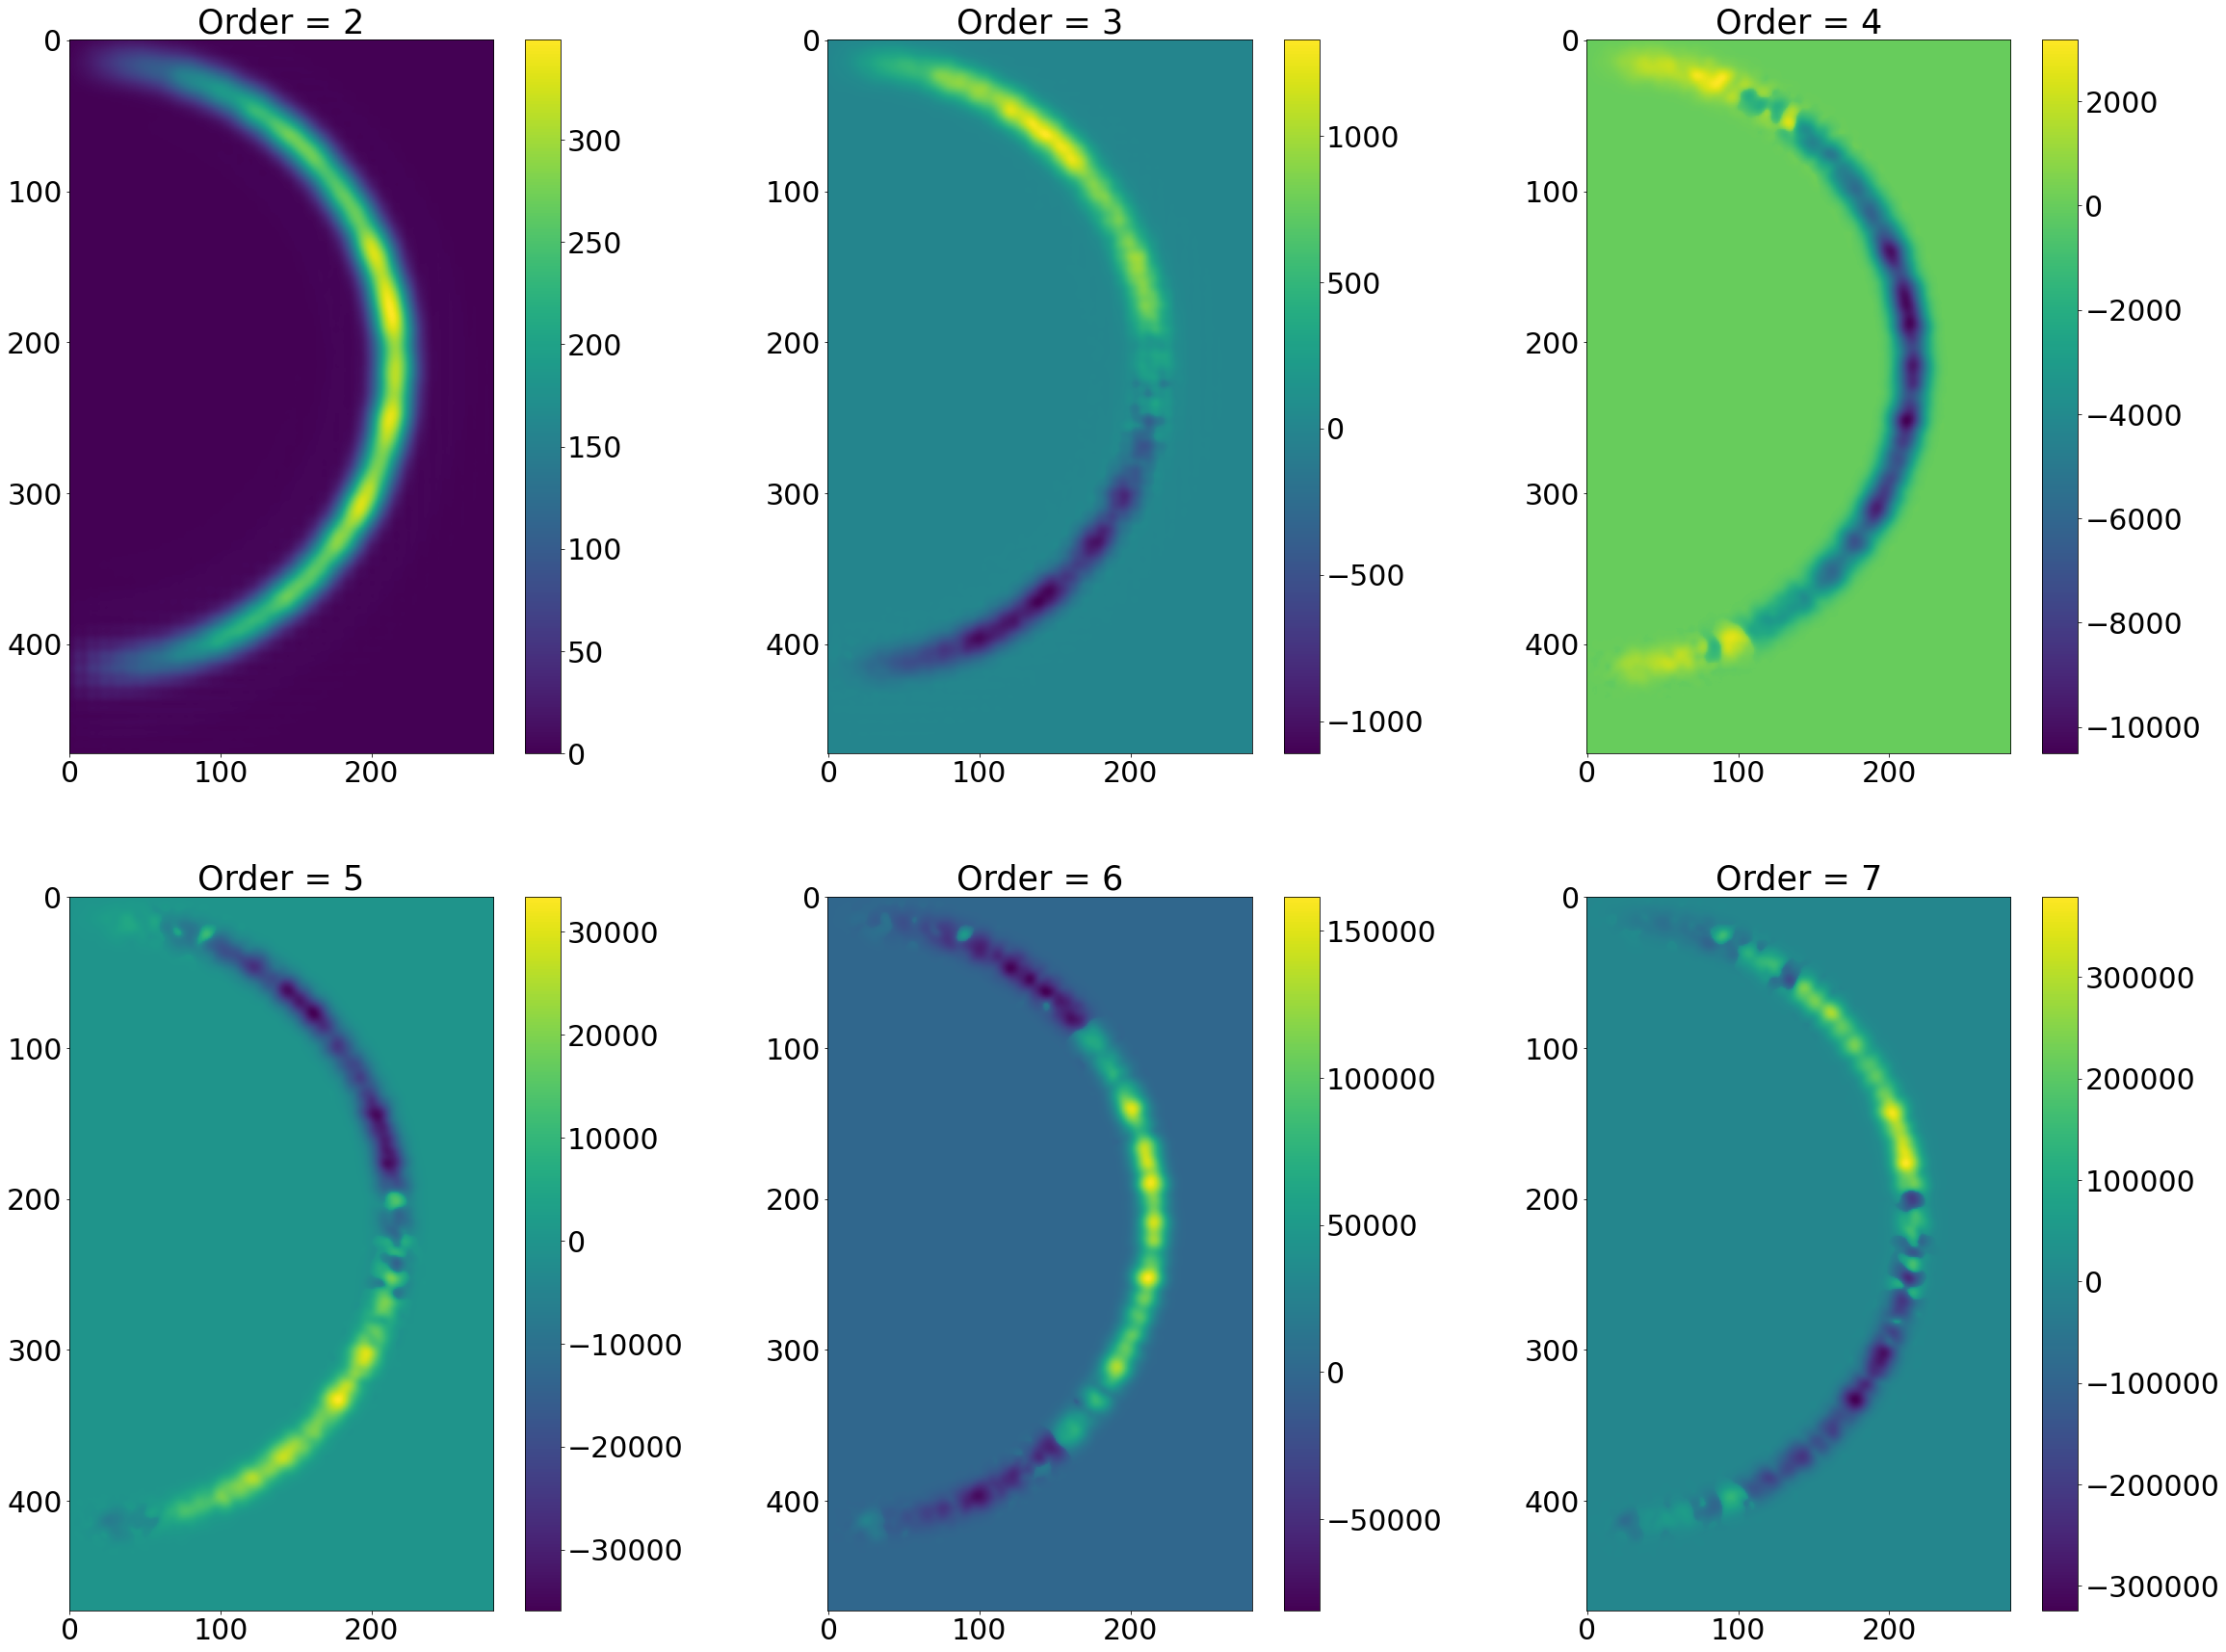

In [11]:
# gamma display
fig, axs = plt.subplots(2,3,figsize=(40,30))
for i in range(2,8):
    row = (i - 2) // 3
    ax = axs[row,i-2-row*3]
    img = ax.imshow((2*(im.cumulants_set[i]>0)-1)*abs(im.cumulants_set[i])**0.9**(i+1))
    ax.tick_params(axis='x', labelsize= 30)
    ax.tick_params(axis='y', labelsize= 30)
    ax.set_title(f'Order = {i}', fontsize=35)
    cb = plt.colorbar(img, ax=ax)
    cb.ax.tick_params(labelsize=30)
    cb.ax.yaxis.get_offset_text().set_fontsize(30)